In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
stocks = ['PETR4', 'MELI34', 'VALE3', 'BBAS3', 'ELET3', 'RENT3', 'CSAN3', 'VBBR3', 'EMBR3', 'VIVA3']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=1095)

def retorna_ativos(stocks, start, end):
    df = pd.DataFrame()

    for i in stocks: 
        ticker = str(i) + '.SA'
        df[i] = yf.download(ticker, start=start, end=end)['Adj Close']

    returns = df.pct_change() #variação percentual
    meanReturns = returns.mean() #média
    covMatrix = returns.cov() #matriz de covariância

    return meanReturns, covMatrix

meanReturns, covMatrix = retorna_ativos(stocks, startDate, endDate)
print(meanReturns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

PETR4     0.002051
MELI34    0.000294
VALE3     0.000231
BBAS3     0.001062
ELET3     0.000671
RENT3     0.000137
CSAN3     0.000236
VBBR3     0.000526
EMBR3     0.001530
VIVA3     0.000710
dtype: float64


Normalizando

In [3]:
weights = np.random.random(len(meanReturns)) #Vai gerar números aleatórios entre 0 e 1 com comprimento do meansReturns
weights /= np.sum(weights) # Divide cada elemento na matriz de pesos pela soma total, normalizando assim os pesos para que a soma de todos eles seja igual a 1.

print(weights)

[0.05695142 0.15347717 0.14964854 0.10905059 0.05542799 0.02459139
 0.13328301 0.09575612 0.14270755 0.07910623]


Executando a simulação

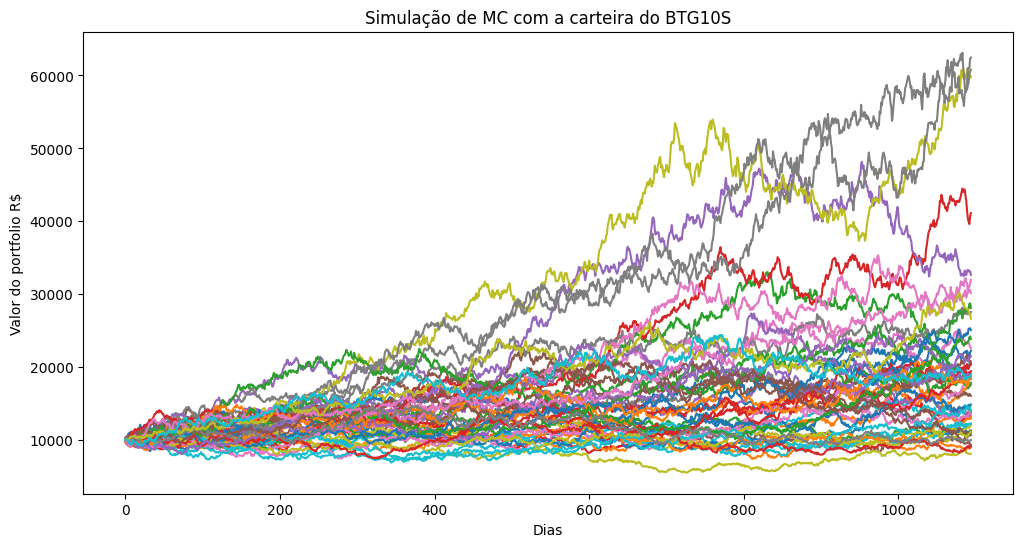

In [4]:
mc_sims = 50 #Número de simulações de Monte Carlo.
T = 1095 #Número de períodos de tempo

#Criação de uma matriz de médias para simulações
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns) #Cria uma matriz bidimensional
meanM = meanM.T #Transpõe a matriz, trocando as linhas pelas colunas, para que cada coluna agora represente as médias para cada ativo durante diferentes períodos de tempo.

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0) #Cria uma matriz bidimensional (shape=(T, mc_sims)) preenchida com zeros para armazenar os resultados das simulações do portfólio. Cada coluna representa uma simulação diferente, e cada linha representa um período de tempo

#Essa parte do código está realizando simulações de Monte Carlo para modelar o comportamento estocástico de um portfólio ao longo do tempo, com base em uma matriz de variações percentuais diárias (dailyReturns) gerada a partir de uma distribuição normal multivariada
initialPortfolio = 10_000

for m in range(0, mc_sims):
    #MC loop
    Z = np.random.normal(size=(T, len(weights))) #Geração de uma matriz de números aleatórios a partir de uma distribuição normal multivariada.
    L = np.linalg.cholesky(covMatrix) #Decomposição de Cholesky da matriz de covariância (covMatrix).
    dailyReturns = meanM+np.inner(L,Z) # Multiplicação interna para obter um conjunto de variações percentuais diárias.
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

largura_figura = 12
altura_figura = 6
plt.figure(figsize=(largura_figura, altura_figura))
plt.plot(portfolio_sims)
plt.ylabel('Valor do portfolio R$')
plt.xlabel('Dias')
plt.title('Simulação de MC com a carteira do BTG10S')
plt.show()